TESLA STOCK MARKET PRICE PREDICTION USING YAHOO API

1. Project Objective

    Clearly define the goal: Predict Tesla's stock price using historical data and machine learning techniques.

2. Data Acquisition

    API Integration: Utilize the Yahoo Finance API to retrieve historical Tesla stock data (e.g., open, high, low, close, volume, adjusted close).
    Data Cleaning: Handle missing values, outliers, and inconsistencies to ensure data quality.

3. Exploratory Data Analysis (EDA)

    Visualization: Create visualizations (e.g., line charts, histograms, correlation matrices) to understand the data's characteristics and trends.
    Statistical Analysis: Calculate key statistics (e.g., mean, median, standard deviation, correlation) to identify patterns and relationships.

4. Feature Engineering

    Technical Indicators: Create technical indicators (e.g., moving averages, RSI, MACD) to capture market sentiment and trends.
    Time-Series Features: Extract time-based features (e.g., day of the week, month, year) to account for seasonal patterns.

5. Data Splitting

    Training and Testing Sets: Divide the dataset into training and testing sets to evaluate model performance.

6. Model Selection and Training

    Time Series Models: Consider models like ARIMA, LSTM, or Prophet, suitable for time-series data.
    Hyperparameter Tuning: Optimize model parameters using techniques like grid search or random search to achieve the best performance.

7. Model Evaluation

    Metrics: Use appropriate metrics (e.g., RMSE, MAE, MSE) to assess model accuracy.
    Cross-Validation: Employ cross-validation techniques to evaluate model generalization.

8. Prediction

    Forecast: Use the trained model to predict future Tesla stock prices.

9. Visualization and Interpretation

    Visualize Predictions: Plot predicted prices against actual prices to evaluate model performance.
    Interpret Results: Analyze the model's predictions to gain insights into potential market trends and factors influencing stock prices.

10. Deployment and Monitoring

    Deployment: Consider deploying the model as a web application or API for real-time predictions.
    Monitoring: Continuously monitor model performance and retrain as needed to adapt to changing market conditions.

The provided code defines a basic framework for predicting Tesla's stock price movement using a Markov model and historical data.

 Here's a breakdown of the code:

1. Libraries and Definitions:

    Imports necessary libraries: numpy for numerical computations, pandas for data manipulation, yfinance for retrieving financial data, and matplotlib.pyplot for plotting.
    Defines states: "up", "down", and "stable" representing daily price movements.
    Sets the number of states based on the defined states list.

2. Transition Matrix:

    Initializes a transition matrix (zero-filled) with dimensions (number of states x number of states). This matrix will store the probability of transitioning from one state to another.

3. Data Retrieval and Cleaning:

    Retrieves Tesla's adjusted closing price data from Yahoo Finance for a specific date range.
    Calculates daily returns (percentage change) from the adjusted closing prices.
    Removes missing values from the returns data.

4. State Classification:

    Loops through daily returns and assigns a state based on the return value:
        Positive return -> "up" state
        Negative return -> "down" state
        Zero return -> "stable" state
    This creates a list (state) representing the state for each day.

5. Transition Matrix Calculation:

    Loops through the state list (except the last day) and updates the transition matrix:
        Identifies the current and next day's states based on their index in the states list.
        Increments the corresponding cell in the transition matrix representing the transition from the current state to the next state.
    Normalizes each row of the transition matrix by dividing each element by the sum of that row. This gives the probability of transitioning from each state.

6. Predicting Future States:

    Gets the index of the current state based on the last element in the state list.
    Initializes a list predicted_states to store the predicted states for the next num_days.
    Loops through num_days:
        Uses the current state and the transition matrix to get the probabilities of transitioning to each state.
        Randomly selects the next state based on these probabilities (using np.random.choice).
        Appends the selected state to the predicted_states list.
        Updates the current_state for the next iteration.

7. Predicting Stock Prices:

    Initializes a list predicted_prices to store the predicted adjusted closing prices.
        The first element is the actual closing price retrieved from Yahoo Finance data (last day).
    Loops through the predicted states (except the first one):
        Based on the predicted state:
            "up": Increase the previous price by a random value from a normal distribution with a mean of 5% and a standard deviation of 10%.
            "down": Decrease the previous price by a random value from a normal distribution with a mean of -5% and a standard deviation of 10%.
            "stable": Keep the previous price the same.
        Appends the calculated price to the predicted_prices list.

8. Visualization:

    Plots the predicted prices against the number of days (x-axis).
    Labels the axes and adds a title to the plot.
    Shows the visualization of the predicted price movements.

Limitations:

    This is a simple Markov model and doesn't account for many factors affecting stock prices.
    The price predictions use a basic random walk based on state and don't consider historical trends.

Improvements:

    Use more sophisticated models like LSTMs to learn complex patterns from historical data.
    Include additional features (e.g., trading volume, news sentiment) to improve prediction accuracy.
    Implement backtesting to evaluate the model's performance on past data.



[*********************100%***********************]  1 of 1 completed
<ipython-input-1-85a4a74f17e7>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if returns[i] > 0:
<ipython-input-1-85a4a74f17e7>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif returns[i] < 0:
<ipython-input-1-85a4a74f17e7>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices = [tesla["Adj Close"][-1]]


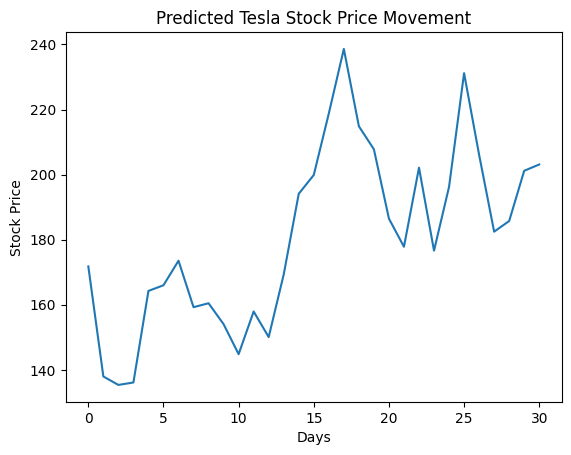

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the states
states = ["up", "down", "stable"]

# Define the number of states
num_states = len(states)

# Define the transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Define the number of days for prediction
num_days = 30

# Define the start date and end date for data retrieval
start_date = "2010-01-01"
end_date = "2023-05-09"

# Retrieve Tesla stock data from Yahoo Finance API
tesla = yf.download("TSLA", start=start_date, end=end_date)

# Calculate daily returns
returns = tesla["Adj Close"].pct_change()

# Clean the data by removing missing values
returns = returns.dropna()

# Define the state for each day based on daily return
state = []
for i in range(len(returns)):
    if returns[i] > 0:
        state.append(states[0])
    elif returns[i] < 0:
        state.append(states[1])
    else:
        state.append(states[2])

# Calculate the transition matrix
for i in range(len(state)-1):
    current_state = states.index(state[i])
    next_state = states.index(state[i+1])
    transition_matrix[current_state][next_state] += 1
for i in range(num_states):
    row_sum = sum(transition_matrix[i])
    if row_sum > 0:
        transition_matrix[i] /= row_sum

# Predict the future state based on the transition matrix
current_state = states.index(state[-1])
predicted_states = [current_state]
for i in range(num_days):
    probabilities = transition_matrix[current_state]
    next_state = np.random.choice(num_states, p=probabilities)
    predicted_states.append(next_state)
    current_state = next_state

# Convert predicted states to actual stock prices
predicted_prices = [tesla["Adj Close"][-1]]
for i in range(num_days):
    if predicted_states[i+1] == 0:
        predicted_prices.append(predicted_prices[-1] * (1 + np.random.normal(0.05, 0.1)))
    elif predicted_states[i+1] == 1:
        predicted_prices.append(predicted_prices[-1] * (1 - np.random.normal(0.05, 0.1)))
    else:
        predicted_prices.append(predicted_prices[-1])

# Visualize the predicted prices
plt.plot(range(len(predicted_prices)), predicted_prices)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Predicted Tesla Stock Price Movement")
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-5-6dc92fa9caa7>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if returns[i] > 0:
<ipython-input-5-6dc92fa9caa7>:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif returns[i] < 0:
<ipython-input-5-6dc92fa9caa7>:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices = [zomato["Adj Close"][-1]]


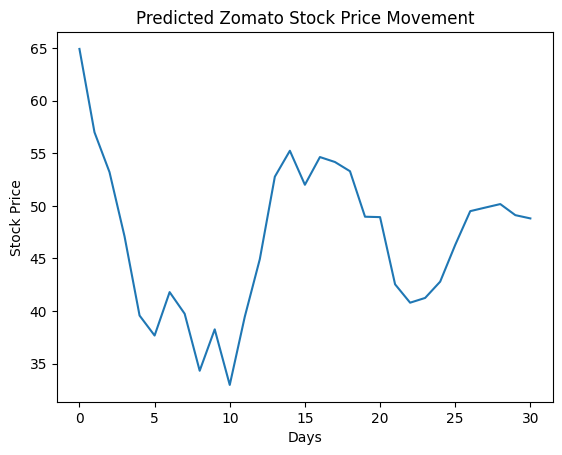

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the states
states = ["up", "down", "stable"]

# Define the number of states
num_states = len(states)

# Define the transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Define the number of days for prediction
num_days = 30

# Define the start date and end date for data retrieval
start_date = "2010-01-01"
end_date = "2023-05-09"

# Retrieve Tesla stock data from Yahoo Finance API
zomato = yf.download("ZOMATO.NS", start=start_date, end=end_date)

# Calculate daily returns
returns = zomato["Close"].pct_change()

# Clean the data by removing missing values
returns = returns.dropna()

# Define the state for each day based on daily return
state = []
for i in range(len(returns)):
    if returns[i] > 0:
        state.append(states[0])
    elif returns[i] < 0:
        state.append(states[1])
    else:
        state.append(states[2])

# Calculate the transition matrix
for i in range(len(state)-1):
    current_state = states.index(state[i])
    next_state = states.index(state[i+1])
    transition_matrix[current_state][next_state] += 1
for i in range(num_states):
    row_sum = sum(transition_matrix[i])
    if row_sum > 0:
        transition_matrix[i] /= row_sum

# Predict the future state based on the transition matrix
current_state = states.index(state[-1])
predicted_states = [current_state]
for i in range(num_days):
    probabilities = transition_matrix[current_state]
    next_state = np.random.choice(num_states, p=probabilities)
    predicted_states.append(next_state)
    current_state = next_state

# Convert predicted states to actual stock prices
predicted_prices = [zomato["Adj Close"][-1]]
for i in range(num_days):
    if predicted_states[i+1] == 0:
        predicted_prices.append(predicted_prices[-1] * (1 + np.random.normal(0.05, 0.1)))
    elif predicted_states[i+1] == 1:
        predicted_prices.append(predicted_prices[-1] * (1 - np.random.normal(0.05, 0.1)))
    else:
        predicted_prices.append(predicted_prices[-1])

# Visualize the predicted prices
plt.plot(range(len(predicted_prices)), predicted_prices)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Predicted Zomato Stock Price Movement")
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-20-7b68e3dff772>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if returns[i] > 0:
<ipython-input-20-7b68e3dff772>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif returns[i] < 0:
<ipython-input-20-7b68e3dff772>:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_pr

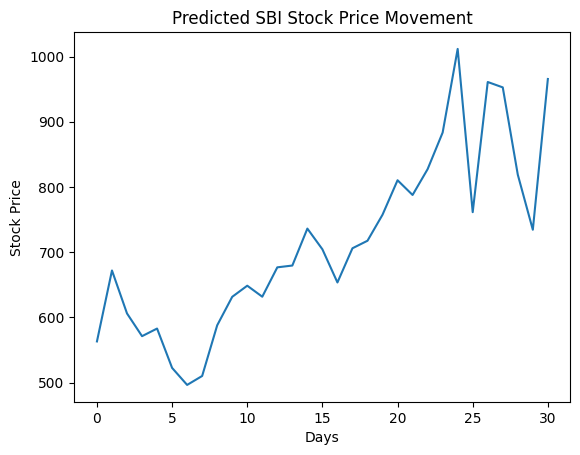

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the states
states = ["up", "down", "stable"]

# Define the number of states
num_states = len(states)

# Define the transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Define the number of days for prediction
num_days = 30

# Define the start date and end date for data retrieval
start_date = "2010-01-01"
end_date = "2023-05-09"

# Retrieve Tesla stock data from Yahoo Finance API
zomato = yf.download("SBIN.NS", start=start_date, end=end_date)

import yfinance as yf

# Retrieve SBI stock data
sbi = yf.download("SBIN.NS", start=start_date, end=end_date)

# Calculate daily returns
returns = sbi["Close"].pct_change()


# Clean the data by removing missing values
returns = returns.dropna()

# Define the state for each day based on daily return
state = []
for i in range(len(returns)):
    if returns[i] > 0:
        state.append(states[0])
    elif returns[i] < 0:
        state.append(states[1])
    else:
        state.append(states[2])

# Calculate the transition matrix
for i in range(len(state)-1):
    current_state = states.index(state[i])
    next_state = states.index(state[i+1])
    transition_matrix[current_state][next_state] += 1
for i in range(num_states):
    row_sum = sum(transition_matrix[i])
    if row_sum > 0:
        transition_matrix[i] /= row_sum

# Predict the future state based on the transition matrix
current_state = states.index(state[-1])
predicted_states = [current_state]
for i in range(num_days):
    probabilities = transition_matrix[current_state]
    next_state = np.random.choice(num_states, p=probabilities)
    predicted_states.append(next_state)
    current_state = next_state

# Convert predicted states to actual stock prices
predicted_prices = [sbi["Adj Close"][-1]]
for i in range(num_days):
    if predicted_states[i+1] == 0:
        predicted_prices.append(predicted_prices[-1] * (1 + np.random.normal(0.05, 0.1)))
    elif predicted_states[i+1] == 1:
        predicted_prices.append(predicted_prices[-1] * (1 - np.random.normal(0.05, 0.1)))
    else:
        predicted_prices.append(predicted_prices[-1])

# Visualize the predicted prices
plt.plot(range(len(predicted_prices)), predicted_prices)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Predicted SBI Stock Price Movement")
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-25-585f72a20a9e>:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if returns[i] > 0:
<ipython-input-25-585f72a20a9e>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif returns[i] < 0:
<ipython-input-25-585f72a20a9e>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_prices = [irfc["Adj Close"][-1]]


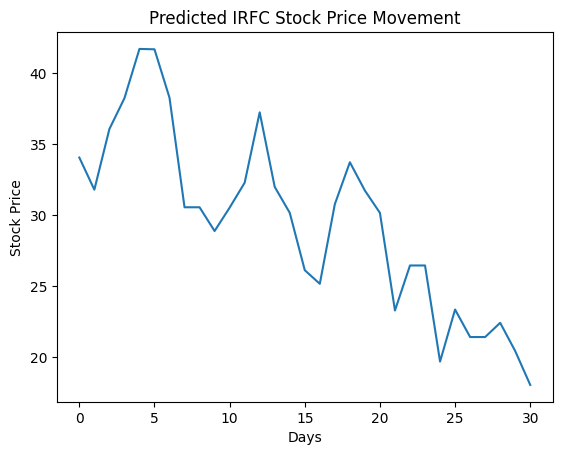

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the states
states = ["up", "down", "stable"]

# Define the number of states
num_states = len(states)

# Define the transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Define the number of days for prediction
num_days = 30

# Define the start date and end date for data retrieval
start_date = "2015-01-01"
end_date = "2023-05-09"

# Retrieve SBI stock data
irfc = yf.download("IRFC.BO", start=start_date, end=end_date)

# Calculate daily returns
returns = irfc["Close"].pct_change()


# Clean the data by removing missing values
returns = returns.dropna()

# Define the state for each day based on daily return
state = []
for i in range(len(returns)):
    if returns[i] > 0:
        state.append(states[0])
    elif returns[i] < 0:
        state.append(states[1])
    else:
        state.append(states[2])

# Calculate the transition matrix
for i in range(len(state)-1):
    current_state = states.index(state[i])
    next_state = states.index(state[i+1])
    transition_matrix[current_state][next_state] += 1
for i in range(num_states):
    row_sum = sum(transition_matrix[i])
    if row_sum > 0:
        transition_matrix[i] /= row_sum

# Predict the future state based on the transition matrix
current_state = states.index(state[-1])
predicted_states = [current_state]
for i in range(num_days):
    probabilities = transition_matrix[current_state]
    next_state = np.random.choice(num_states, p=probabilities)
    predicted_states.append(next_state)
    current_state = next_state

# Convert predicted states to actual stock prices
predicted_prices = [irfc["Adj Close"][-1]]
for i in range(num_days):
    if predicted_states[i+1] == 0:
        predicted_prices.append(predicted_prices[-1] * (1 + np.random.normal(0.05, 0.1)))
    elif predicted_states[i+1] == 1:
        predicted_prices.append(predicted_prices[-1] * (1 - np.random.normal(0.05, 0.1)))
    else:
        predicted_prices.append(predicted_prices[-1])

# Visualize the predicted prices
plt.plot(range(len(predicted_prices)), predicted_prices)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Predicted IRFC Stock Price Movement")
plt.show()